<a href="https://colab.research.google.com/github/nish700/padai/blob/master/0104_MPNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn.datasets
import numpy as np
import pandas as pd

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [4]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [0]:
data = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [7]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
data['class'] = breast_cancer.target

In [9]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [12]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [13]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('class',axis=1)
Y = data['class']

In [16]:
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [17]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [19]:
print(X.shape, X_train.shape,X_test.shape,Y.shape, Y_train.shape, Y_test.shape)

(569, 30) (426, 30) (143, 30) (569,) (426,) (143,)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15)

In [21]:
print(X.shape, X_train.shape,X_test.shape,Y.shape, Y_train.shape, Y_test.shape)

(569, 30) (483, 30) (86, 30) (569,) (483,) (86,)


In [22]:
print(Y.mean(),Y_train.mean(), Y_test.mean())

0.6274165202108963 0.629399585921325 0.6162790697674418


In [0]:
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.15,stratify=Y)

In [24]:
print(X.mean(),X_train.mean(),X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y, random_state=1)

In [26]:
print(X.mean(),X_train.mean(),X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [27]:
Y_train.isnull().any()
Y_train.isnull().sum().sum()

0

In [28]:
Y_train.shape

(483,)

In [29]:
print(Y_train[340:344])
print(Y_test[343])

544    1
123    1
63     1
336    1
Name: class, dtype: int64
0


##Binarisation of Input

In [0]:
import matplotlib.pyplot as plt

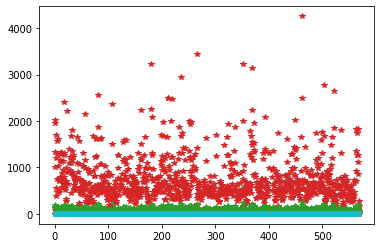

In [31]:
plt.plot(X_train,'*')
plt.show()

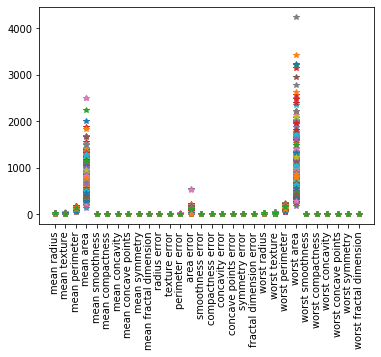

In [32]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_train_binarised_1 = X_train['mean area'].map(lambda x: 1 if x>1000 else 0)

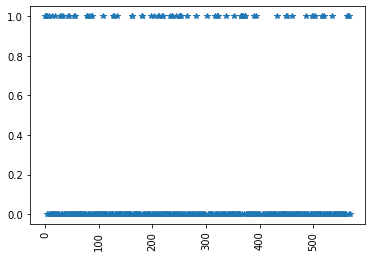

In [34]:
plt.plot(X_train_binarised_1,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_train_binarised = X_train.apply(pd.cut,bins=2,labels=[1,0])

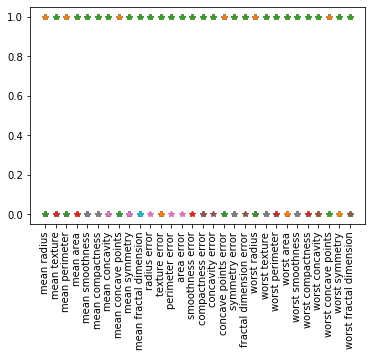

In [36]:
plt.plot(X_train_binarised.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_test_binarised_1 = X_test['mean area'].map(lambda x: 1 if x>1000 else 0)

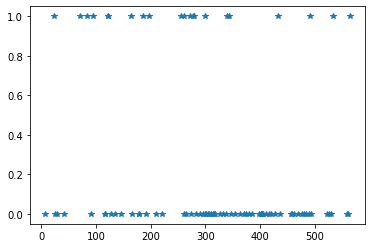

In [38]:
plt.plot(X_test_binarised_1.T,'*')
plt.show()

In [0]:
X_test_binarised = X_test.apply(pd.cut,bins=2,labels=[1,0])

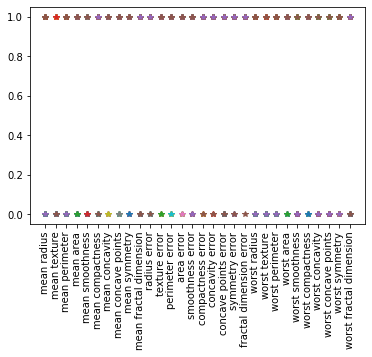

In [40]:
plt.plot(X_test_binarised.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [41]:
print(type(X_train_binarised))
type(X_test_binarised)

<class 'pandas.core.frame.DataFrame'>


pandas.core.frame.DataFrame

In [0]:
X_binarised_train = X_train_binarised.values
X_binarised_test = X_test_binarised.values


In [43]:
type(X_binarised_train)

numpy.ndarray

## MP Neuron Model

In [0]:
from random import randint

In [45]:
b = 3

i=randint(0,X_binarised_train.shape[0])

print('For row:' , i)

if (np.sum(X_binarised_train[i,:]))> b:
  print('The inference is malignant')
else:
  print('Inference is Benign')
  
print(Y_train[i])
  
if (Y_train[i]==1):
  print('ground truth is malignant')
else:
  print('ground truth is benign')

For row: 118
The inference is malignant
0
ground truth is benign


In [46]:
Y_train.shape 

(483,)

In [47]:
X_binarised_train.shape

(483, 30)

In [48]:
b = 3

Y_pred_train=[]
accuracy_count=0

for x,y in zip(X_binarised_train,Y_train):
  y_pred= (np.sum(x)>=b)
  Y_pred_train.append(y_pred)
  accuracy_count+= (y==y_pred)
    
print(accuracy_count, accuracy_count/X_binarised_train.shape[0])

303 0.6273291925465838


In [49]:
for b in range(X_binarised_train.shape[1] +1):
  
  Y_pred_train=[]
  accuracy_count=0
  
  for x,y in zip(X_binarised_train,Y_train):
    y_pred= (np.sum(x)>=b)
    Y_pred_train.append(y_pred)
    accuracy_count += (y_pred==y)
  
  print(b,accuracy_count/X_binarised_train.shape[0])


0 0.6273291925465838
1 0.6273291925465838
2 0.6273291925465838
3 0.6273291925465838
4 0.6273291925465838
5 0.6273291925465838
6 0.6273291925465838
7 0.6273291925465838
8 0.6273291925465838
9 0.6273291925465838
10 0.6273291925465838
11 0.6273291925465838
12 0.6273291925465838
13 0.629399585921325
14 0.6314699792960663
15 0.6335403726708074
16 0.6438923395445134
17 0.650103519668737
18 0.6583850931677019
19 0.6666666666666666
20 0.6749482401656315
21 0.6915113871635611
22 0.7018633540372671
23 0.7246376811594203
24 0.7556935817805382
25 0.7888198757763976
26 0.8198757763975155
27 0.8426501035196687
28 0.8426501035196687
29 0.8136645962732919
30 0.7515527950310559


In [0]:
from sklearn.metrics import accuracy_score

In [51]:
b = 27

Y_pred_test=[]

for x in X_binarised_test:
  y_pred = (np.sum(x)>=b)
  Y_pred_test.append(y_pred)
  
accuracy = accuracy_score(Y_pred_test,Y_test)

print(b,accuracy)

27 0.8604651162790697


## MP Neuron Class

In [0]:
class MPNeuron:
  
  def __init__(self):
    self.b=None
  
  def model(self,x):
    return(sum(x)>=self.b)
  
  
  def predict(self,X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return(np.array(Y))
    
  def fit(self,X,Y):
    accuracy={}
    for b in range(X.shape[1] + 1):
      self.b=b
      Y_pred= self.predict(X)
      accuracy[b]= accuracy_score(Y_pred,Y)
    best_b = max(accuracy, key=accuracy.get)
    self.b= best_b
    
    print('Optimal value of b is:', best_b)
    print('Highest accuracy is:', accuracy[best_b])
  

In [0]:
mp_neuron = MPNeuron()

In [54]:
mp_neuron.fit(X_binarised_train,Y_train)

Optimal value of b is: 27
Highest accuracy is: 0.8426501035196687


In [55]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)
print(accuracy_test)

0.8604651162790697
